       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140        

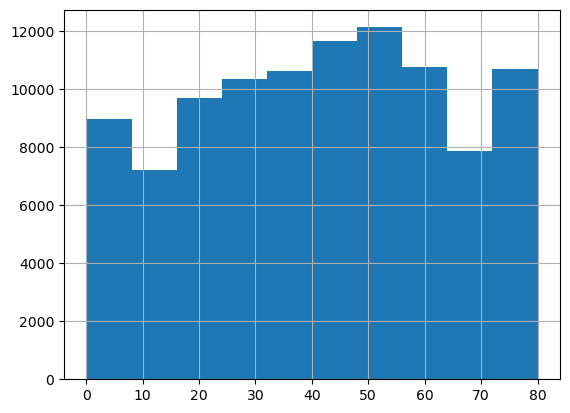

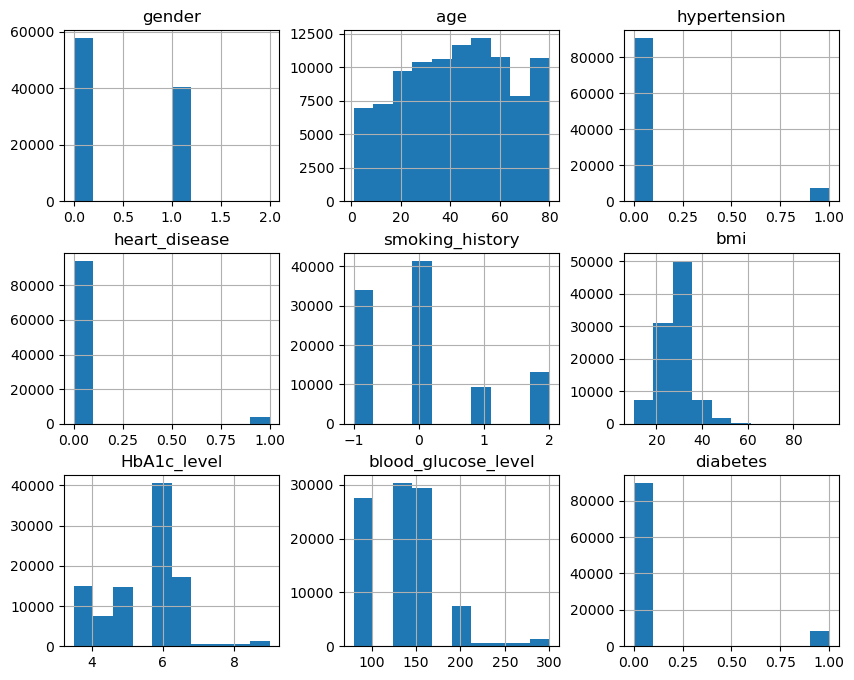

[[17414   506]
 [  466  1211]]
0.9504005715160484
###################################################
[[17835    85]
 [  546  1131]]
0.9678011940603154
###################################################


C:\Users\m.m.s\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[17813   107]
 [  661  1016]]
0.9608103281114456
###################################################
[[17830    90]
 [  710   967]]
0.9591774251160892
###################################################


,Model Name,Accuracy Score
3,Random Forest Classifier,96.77
0,K Neighbors Classifier,95.94
1,Linear SVM,95.85
2,Decision Tree Classifier,94.93


In [40]:
#المكتبات
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
# linear algebra
import numpy as np
# data processing
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# import seaborn as sns
# from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#importing the dateset
diabetes = pd.read_csv('diabetes_prediction_dataset.csv')
print(diabetes )
#Analysis of dataset
#بدا يشوف المدخلات الفاضى
diabetes.isnull().sum()
diabetes
#بيشوف عدد الmale and female and other
diabetes['gender'].value_counts()
#بيدى رقم ل gender

label_encoder = preprocessing.LabelEncoder()
diabetes['gender'] = label_encoder.fit_transform(diabetes['gender'])
diabetes
#تحليل تاريخ التدخين
diabetes['smoking_history'].value_counts()
#تغير اامتغيرات الى ارقام
smoking_history_mapping = {'never': 0, 'No Info': -1, 'current': 2, 'former': 1, 'ever': 2, 'not current': 0}
diabetes['smoking_history'] = diabetes['smoking_history'].map(smoking_history_mapping)
diabetes
#وصف
diabetes.describe()
#تحليل بالرسم للعمر
diabetes['age'].hist()
#حذف لو الرقم بتاع العمر decimal
diabetes = diabetes[diabetes['age'].mod(1) == 0]
diabetes
#تغير الداتا طيب
diabetes['age'] = diabetes['age'].astype(int)
diabetes.head()
#بيعمل زى ملخص
diabetes.info()
#بيجيب رسومات عن الداتا ست
diabetes.hist(bins=10, figsize=(10,8))
plt.show()
#traing and testing
X = diabetes.iloc[:,:-1].values
y = diabetes.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
#scaling
from sklearn import preprocessing
stand = preprocessing.StandardScaler()
X_train = stand.fit_transform(X_train)
X_test = stand.transform(X_test)
X_train
X_test
# Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print('###################################################')
#Random Forest
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print('###################################################')
#using KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print('###################################################')


#svm
linear_kernel = SVC(kernel = 'linear')
linear_kernel.fit(X_train, y_train)
y_pred = linear_kernel.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

print('###################################################')

#Accuracy of all models
# df = pd.DataFrame({
#     'Model Name': ['K Neighbors Classifier','Linear SVM', 'Decision Tree Classifier', 'Random Forest Classifier'],
#     'Accuracy Score':  [95.94, 95.85,  94.93, 96.77]
# })
# df
df.sort_values(by = ['Accuracy Score'], ascending = False, inplace=True)
df
